In [2]:
import os, sys
sys.path.append('../src/')

from copulae1 import *

import json
with open('../src/configs/config_coingecko_future_v3_MM.json','r') as file:
    config = json.load(file)
config
data_name = config['data_name']
calibration_method  = config['calibration_method']
OHR = pd.read_hdf('../results/'+data_name +'/'+calibration_method+'/best_h.h5')
if not os.path.exists("../results/" + data_name + "/MLE/reports"):
	print("Create new folder for results")
	os.mkdir("../results/" + data_name + "/MLE/reports")
	os.mkdir("../results/" + data_name + "/MM/reports")
    
if calibration_method == "MLE":
    report_path = "../results/" + data_name + "/MLE/reports/"
    result_path = "../results/" + data_name + "/MLE/"
elif calibration_method == "MM":
    report_path = "../results/" + data_name + "/MM/reports/"
    result_path = "../results/" + data_name + "/MM/"
    
data_path = "../processed_data/"+data_name+'/test/'

In [3]:
natp_path = '../_mathematica/data/'
natp_ls = os.listdir(natp_path)
natp_h = [l for l in natp_ls if l.endswith('_h.csv')]
file_names = [l.replace('_h','') for l in natp_h]
OHR_combined = []
for i in range(len(natp_h)):
    print(i)
    _natp_h = pd.DataFrame(open(natp_path+natp_h[i], 'r').readlines())
    _natp_h = _natp_h.iloc[1:7,:]
    file_name = natp_h[i].replace('_h','')
    for i in range(len(_natp_h)):
        _natp_h.iloc[i,0] = np.float32(_natp_h.iloc[i,0].replace('\n',''))
    _natp_h.columns = ['NIG_factor']
    _natp_h.index = ['Variance', 'VaR q=0.01', 'VaR q=0.05', 'ES q=0.01', 'ES q=0.05', 'ERM k=10']
    _natp_h = _natp_h.T
    
    OHR_combined.append(OHR.loc[:,file_name].append(_natp_h))
OHR = pd.concat(OHR_combined, axis=1, keys=file_names).dropna(axis=1)

0
1
2
3
4
5


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [4]:
OHR

73.csv                                                      \
                 ERM k=10 ES q=0.01 ES q=0.05 VaR q=0.01 VaR q=0.05  Variance   
Gaussian         0.920996  0.845898  0.914258   0.928906   0.957031  0.907715   
t_Copula         0.903418   0.81875  0.869531   0.829883   0.933789  0.892383   
t_Copula_Capped  0.912402  0.838281  0.896094   0.850098   0.947754  0.902344   
Clayton          0.913574  0.718262  0.871289   0.820703    0.96875  0.906445   
Frank            0.529004  0.544824   0.50918   0.520703    1.09043  0.604297   
Gumbel           0.971094  0.892578  0.975293    1.02617   0.998926  0.909766   
Plackett         0.930176  0.792676  0.894727   0.814355   0.961133  0.896973   
Gauss Mix Indep  0.920996  0.462891  0.796387   0.535937   0.924121  0.828125   
NIG_factor       0.882039   0.54138  0.780141   0.640981   0.819281   0.82891   

                   36.csv                                 ...     0.csv  \
                 ERM k=10 ES q=0.01 ES q=0.05 VaR q=0.01  ... ES q=0.05   
Gaussian         0.872266  0.921973   0.88877    0.85791  ...  0.911426   
t_Copula         0.859766       0.9   0.86709   0.919434  ...  0.910449   
t_Copula_Capped  0.867285  0.916504  0.880566   0.923242  ...  0.915234   
Clayton          0.850293  0.769434  0.821094   0.930859  ...  0.821484   
Frank            0.524902  0.593164  0.476855   0.523437  ...  0.487793   
Gumbel           0.936914  0.991211   0.97998    0.94375  ...  0.980762   
Plackett         0.858887  0.882227  0.859863   0.874805  ...  0.887402   
Gauss Mix Indep  0.864258  0.798437  0.868262   0.862109  ...  0.908008   
NIG_factor       0.838499   0.83901     0.853   0.851042  ...  0.900107   

                                                   42.csv                      \
                VaR q=0.01 VaR q=0.05  Variance  ERM k=10 ES q=0.01 ES q=0.05   
Gaussian           0.96875   0.810156  0.890137  0.893652  0.934473  0.902441   
t_Copula          0.957031   0.840039  0.875879  0.891113  0.923242  0.894238   
t_Copula_Capped   0.964062   0.821973  0.886523  0.892773  0.929883  0.899805   
Clayton            0.95752   0.817871  0.904883  0.894824  0.805273  0.873047   
Frank             0.578125   0.450977  0.611914  0.504102  0.596777  0.464941   
Gumbel            0.986328   0.882812  0.883691  0.950098  0.987109  0.986035   
Plackett          0.919727   0.831836  0.858496  0.891504  0.901953  0.887109   
Gauss Mix Indep   0.948242   0.850195   0.86123  0.893848  0.798535  0.866895   
NIG_factor         0.90724   0.858251  0.861697  0.847829  0.847845  0.829055   

                                                 
                VaR q=0.01 VaR q=0.05  Variance  
Gaussian          0.949707   0.858203  0.903809  
t_Copula          0.932715   0.871875  0.892676  
t_Copula_Capped    0.94082   0.862598  0.901074  
Clayton           0.968652   0.909473  0.915723  
Frank             0.512598    1.07813  0.590332  
Gumbel             1.03467   0.921875  0.895605  
Plackett          0.906445   0.887109  0.881934  
Gauss Mix Indep   0.867187   0.912305  0.841504  
NIG_factor        0.859913   0.834751  0.825828  

[9 rows x 450 columns]

In [5]:
Copula_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep', 'NIG_factor']
# Copula_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']

OHR = OHR.loc[Copula_names,:]

In [6]:
temp = []
for C in Copula_names:
    hs_by_Copula = OHR.loc[C:C,:].melt()
    hs_by_Copula.columns = ['file_name', 'risk_measure', 'OHR']
    hs_by_Copula.loc[:, 'copula'] = C
    temp.append(hs_by_Copula)

OHR_to_math = pd.concat(temp, axis=0)

In [7]:
files = np.unique(OHR_to_math.file_name)
risk_measures = np.unique(OHR_to_math.risk_measure)

In [8]:
# C = Copula_names[0]
results = {}

for C in Copula_names:
    for rm in risk_measures:
        id_C = OHR_to_math.copula == C
        id_rm = OHR_to_math.risk_measure == rm


        df = OHR_to_math.loc[id_C&id_rm, :]
        df.reset_index(inplace=True, drop=True)

        rh_arr = []
        rs_arr = []
        rf_arr = []

        Date_arr = []

        for i in range(len(df)):
            h = df.iloc[i,:].OHR
            test = pd.read_csv(data_path+df.iloc[i,:].file_name)
            Date = test.Date
            rs = test.loc[:, 'log return bitcoin']
            rf = test.loc[:, 'log return future']
            rh = rs - h*rf
            rh_arr.append(rh)
            Date_arr.append(Date)

            rs_arr.append(rs)
            rf_arr.append(rf)
            
        rh_df = pd.DataFrame({'Date':np.array(Date_arr).reshape((-1)), 'rh':np.array(rh_arr).reshape((-1))})
        rs_df = pd.DataFrame({'Date':np.array(Date_arr).reshape((-1)), 'rs':np.array(rs_arr).reshape((-1))})
        rf_df = pd.DataFrame({'Date':np.array(Date_arr).reshape((-1)), 'rf':np.array(rf_arr).reshape((-1))})
        
        rh_df.Date = pd.to_datetime(rh_df.Date)
        rs_df.Date = pd.to_datetime(rs_df.Date)
        rf_df.Date = pd.to_datetime(rf_df.Date)
        
        # sort Date to make sure the cumulative sum is correct (sort from old data to new data)
        rh_df = rh_df.sort_values('Date', ascending=True).reset_index( drop=True)
        rs_df = rs_df.sort_values('Date', ascending=True).reset_index( drop=True)
        rf_df = rf_df.sort_values('Date', ascending=True).reset_index( drop=True)
      
        rh_df.loc[:,'cumsum'] = np.cumsum(rh_df.rh)
        rs_df.loc[:,'cumsum'] = np.cumsum(rs_df.rs)
        rf_df.loc[:,'cumsum'] = np.cumsum(rf_df.rf)
        
        investment = 1
        income_rh = investment*np.exp(rh_df.loc[:,'cumsum'])
        income_rs = investment*np.exp(rs_df.loc[:,'cumsum'])
        income_rf = investment*np.exp(rf_df.loc[:,'cumsum'])
    
        results[(C, rm)] = income_rh

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


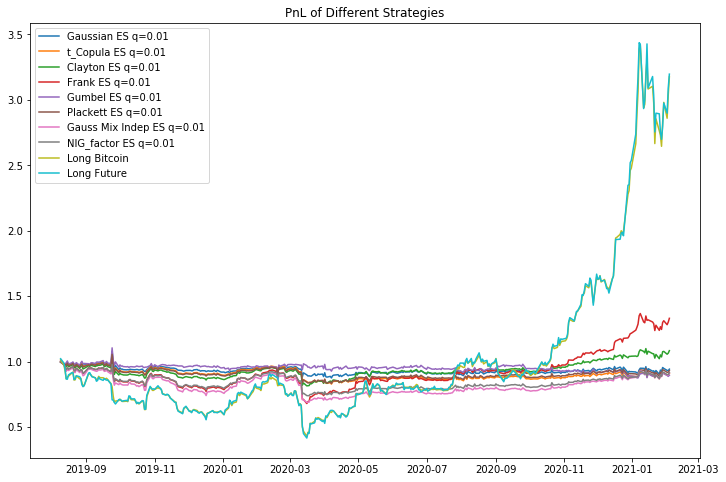

In [9]:
# rm = risk_measures[0]
# rm = 'Variance'
rm = 'ES q=0.01'

plt.figure(figsize=(12,8))
plt.title("PnL of Different Strategies")

for C in Copula_names:
    income_rh = results[(C, rm)]
    plt.plot(rh_df.Date, income_rh, label=C+' '+rm)

plt.plot(rh_df.Date, income_rs, label='Long Bitcoin')
plt.plot(rh_df.Date, income_rf, label='Long Future')
plt.legend()

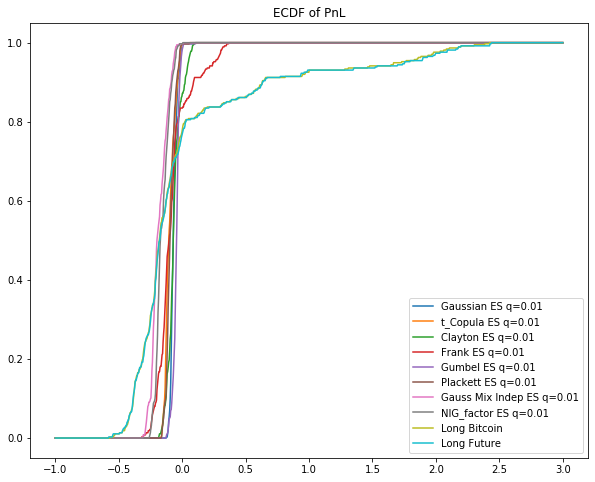

In [10]:
# rm = risk_measures[0]

income = np.linspace(0,4,1000)

ecdf_rs = ECDF(income_rs)
ecdf_rf = ECDF(income_rf)

plt.figure(figsize=(10,8))
plt.title("ECDF of PnL")

for C in Copula_names:
    income_rh = results[(C, rm)]
    ecdf_rh = ECDF(income_rh)

    plt.plot(income-1, ecdf_rh(income), label=C+' '+rm)
plt.plot(income-1, ecdf_rs(income), label='Long Bitcoin')
plt.plot(income-1, ecdf_rf(income), label='Long Future')
plt.legend()

In [11]:
print(Copula_names,'\n', risk_measures)

['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep', 'NIG_factor'] 
 ['ERM k=10' 'ES q=0.01' 'ES q=0.05' 'VaR q=0.01' 'VaR q=0.05' 'Variance']


In [112]:
j=2

r1 = np.array(results[('Gaussian'), ('Variance')])
r2 = np.array(results[('Gumbel'), ('ES q=0.01')])

# r2 = np.array(results[('Gaussian'), ('Variance')])
# r1 = np.array(results[('Gumbel'), ('ES q=0.05')])

N = len(r1)
M = len(r2)

In [124]:
import pickle
with open('SOSD.pickle', 'rb') as handle:
    SOSD = pickle.load(handle)

'0.24.2'

In [129]:
pd.read_pickle('SOSD.pkl')

AttributeError: 'DataFrame' object has no attribute '_data'

In [ ]:
with open('v3_OOS_income.pickle', 'rb') as handle:
    pickle.dump(results, handle)

In [113]:
_min = np.min([np.min(r1), np.min(r2)])
_max = np.max([np.max(r1), np.max(r2)])
income = np.linspace(_min, _max, 1000)

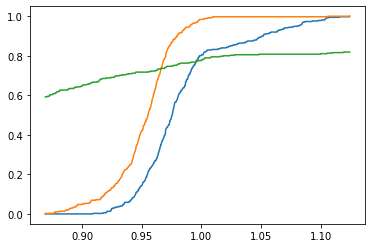

In [114]:
plt.plot(income, ECDF(r1)(income))
plt.plot(income, ECDF(r2)(income))

plt.plot(income, ecdf_rs(income))

In [115]:
print(r1)

[0.99520268 0.98098121 0.98445557 0.98914664 1.00399954 0.98033714
 0.98890751 0.99580223 0.98264451 0.97905993 0.99135621 0.97043248
 0.98917649 1.0016242  0.98254858 0.98538366 0.98577853 0.98080159
 0.99154709 0.9930261  0.98655988 0.99704354 0.99735371 0.99692668
 0.99809046 1.00857875 0.98642836 0.99226054 1.00198227 0.98913436
 0.98557182 1.09739456 1.00242687 0.96135802 0.98896042 0.95225815
 0.96802282 0.95803804 0.95972562 0.95477125 0.95316154 0.95500617
 0.95097296 0.95655087 0.95544662 0.95318734 0.95501085 0.95832767
 0.95630911 0.95347898 0.9592582  0.94852334 0.94478389 0.94673987
 0.95438663 0.97333989 0.98685769 0.96693331 0.96373924 0.97704235
 0.96420624 0.97016932 0.97338523 0.97664019 0.97671068 0.97220905
 0.96540458 0.96947591 0.96856711 0.9657276  0.96725655 0.96525257
 0.96301819 0.95939868 0.95431057 0.95366728 0.95117431 0.94586746
 0.95052327 0.95277202 0.95303734 0.95043275 0.94994732 0.95674202
 0.95992699 0.95438989 0.95429392 0.94724304 0.950903   0.9521

In [70]:
def empirical_I(z, x, j):
    # x: one observation of the sample
    return (x <= z)*(z-x)**(j-1)/np.math.factorial(j-1)

In [71]:
def I(z, X, j):
    # Whole sample
    N = len(X)
    return 1/N*np.sum((X <= z)*(z-X)**(j-1))/np.math.factorial(j-1)

In [72]:
fn = lambda z: (I(z, r1, j) - I(z, r2, j))

In [73]:
a = [fn(i) for i in income]

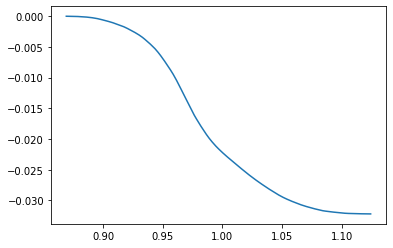

In [74]:
plt.plot(income, a)

In [75]:
S_hat = (N*M/(N+M))**0.5*np.max(a)
S_hat

0.0

In [76]:
from scipy.stats import norm

In [86]:
def max_tk(z, r1, r2, j):
    U1 = norm.rvs(size=len(r1))
    U2 = norm.rvs(size=len(r2))
    part1 = (empirical_I(z, r1, j) - I(z, r1, j))*U1
    part2 = (empirical_I(z, r2, j) - I(z, r2, j))*U2
    return np.sum(part1 - part2)

In [78]:
R = 2000

z = np.expand_dims(income, 0) # first dimension is for grid search
r1 = np.expand_dims(r1, 1) # second dimension for samples
r2 = np.expand_dims(r2, 1) # second dimension for samples

# U1 = norm.rvs(size=(len(income), len(r1), R))
# U2 = norm.rvs(size=(len(z), len(r2), R))

part1 = (empirical_I(z, r1, j) - I(z, r1, j)) # shape: (len(z), len(r1))
part2 = (empirical_I(z, r2, j) - I(z, r2, j))


In [79]:
part1 = np.repeat(part1[None,...], R, axis=0) # repeat the array for R times, shape: (R, len(z), len(r1))
part2 = np.repeat(part2[None,...], R, axis=0)
# repeat on firt array part1[0,0,0] == part1[1,0,0] is True

In [80]:
U1 = norm.rvs(size=(R, len(r1))) # shape: (R, len(r1))
U1 = np.repeat(U1[..., None], len(income), axis=2) # repeat the array for len(income) times, shape: (R, len(r1), len(z))
# U1[0,0,0] == U1[0,0,1] is True

U2 = norm.rvs(size=(R, len(r1))) # shape: (R, len(r1))
U2 = np.repeat(U2[..., None], len(income), axis=2) # repeat the array for len(income) times, shape: (R, len(r1), len(z))
# U2[0,0,0] == U2[0,0,1] is True

In [81]:
a = np.sum(part1*U1 - part2*U2, axis=1)

In [82]:
np.mean(np.max(a, axis=1)*((N*M/(N+M))**0.5) > S_hat)

0.5135

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


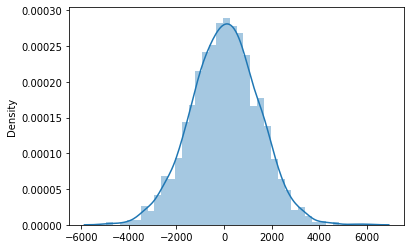

In [83]:
sns.distplot(np.max(a, axis=1))

In [84]:
S_hat

0.0

In [108]:
part1 = np.array([part1 for _ in range(R)])
part2 = np.array([part2 for _ in range(R)])

In [109]:
part1.shape

(2000, 1000, 375)

In [99]:
U1 = norm.rvs(size=np.product(part1.shape))

In [ ]:
U2 = norm.rvs(size=part2.shape)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


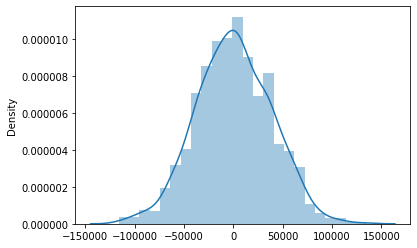

In [47]:
sns.distplot(np.array(S_bar)*(N*M/(N+M))**0.5)

In [101]:

S_bar = []
fn_S_bar = lambda z: max_tk(z, r1, r2, j)


for _i in range(1000):
    if _i%100 == 0:
        print(_i)
        
    b = [fn_S_bar(i) for i in income]
    # plt.plot(income, b)
    # plt.plot(income, b)
    S_bar.append(np.max(b))
    

0
100
200
300
400
500
600
700
800
900


In [102]:
S_bar = np.array(S_bar)*((N*M/(N+M))**0.5)

In [103]:
np.mean(S_bar > S_hat)

1.0

In [52]:
S_hat

15.286923189396594

In [53]:
j

2